In [ ]:
import sys
import torch
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from ReLA2.Inference import GRES_Inference

In [2]:
gres_model = GRES_Inference()

[09/22 01:01:32 detectron2]: Rank of current process: 0. World size: 1
[09/22 01:01:35 detectron2]: Environment info:
-------------------------------  --------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.10.9 (main, Mar  1 2023, 18:23:06) [GCC 11.2.0]
numpy                            1.23.5
detectron2                       0.6 @/home/tsingqguo/anaconda3/lib/python3.10/site-packages/detectron2
Compiler                         GCC 9.4
CUDA compiler                    CUDA 11.8
detectron2 arch flags            8.0
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.0.0+cu117 @/home/tsingqguo/anaconda3/lib/python3.10/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0,1,2,3,4,5,6,7              NVIDIA A100-SXM4-80GB (arch=8.0)
Driver version                   525.125.06
CUDA_H

[09/22 01:01:35 detectron2]: Full config saved to /mnt/local/wwx/Output/GRES/0918/config.yaml
[09/22 01:01:35 d2.utils.env]: Using a generated random seed 38194718


/home/tsingqguo/anaconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model

[09/22 01:01:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /mnt/local/wwx/Models/GRES/gres_swin_base.pth ...
[09/22 01:01:40 fvcore.common.checkpoint]: [Checkpointer] Loading from /mnt/local/wwx/Models/GRES/gres_swin_base.pth ...


In [3]:
def demo_infer(image, text_input):
    image_path = '/mnt/local/wwx/LLM_Data/tmp_test/' + image
    image = Image.open(image_path).convert("RGB")
    image = np.array(image)

    input_dic = {
        'image': image,
        'text_input': text_input,
    }

    resize_image, focus_dict = gres_model.infer(input_dic)
    focus_image = resize_image * focus_dict['mask'][0].cpu()

    # Start the plot
    fig, axs = plt.subplots(1, 2, figsize=(10,5))  # 1 row, 2 columns

    # Display raw image on the left
    axs[0].imshow(resize_image.to("cpu").permute(1,2,0).detach().numpy())
    axs[0].set_title(text_input)
    axs[0].axis('off')  # to hide axis values

    # Display target mask on the right
    axs[1].imshow(focus_image.to("cpu").permute(1,2,0).detach().numpy())
    axs[1].set_title("target mask")
    axs[1].axis('off')  # to hide axis values

    plt.tight_layout()
    plt.show()

    return


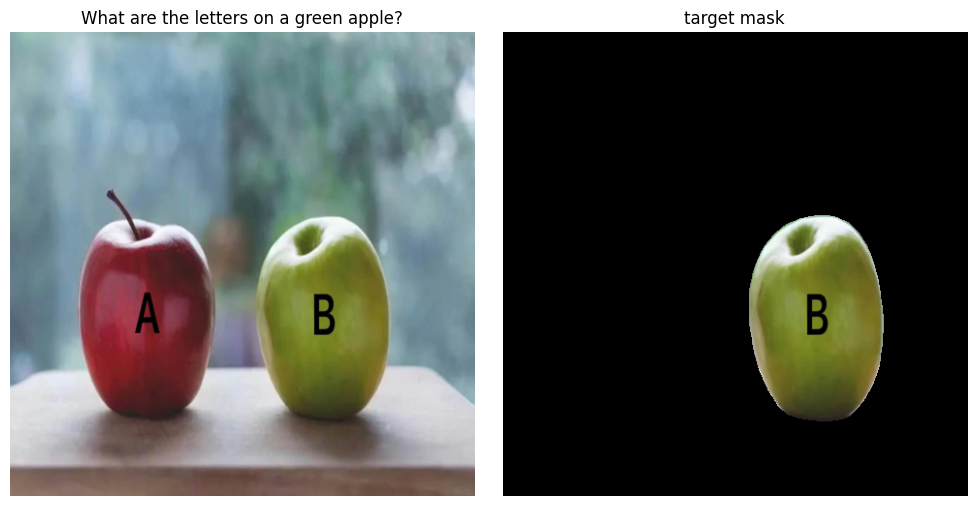

In [17]:
image = "test_00.png"
query = "What are the letters on a green apple?"
demo_infer(image, query)

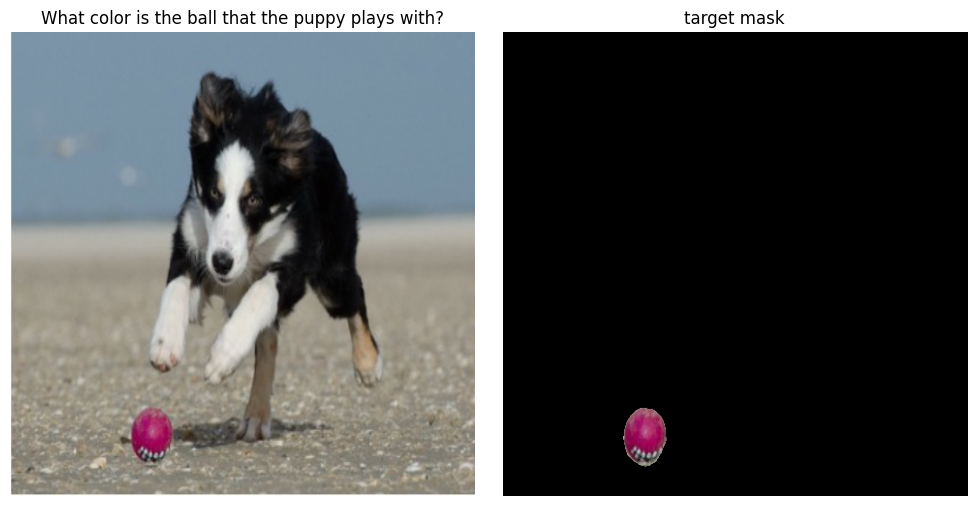

In [6]:
image = "test_01.png"
query = "What color is the ball that the puppy plays with?"
demo_infer(image, query)

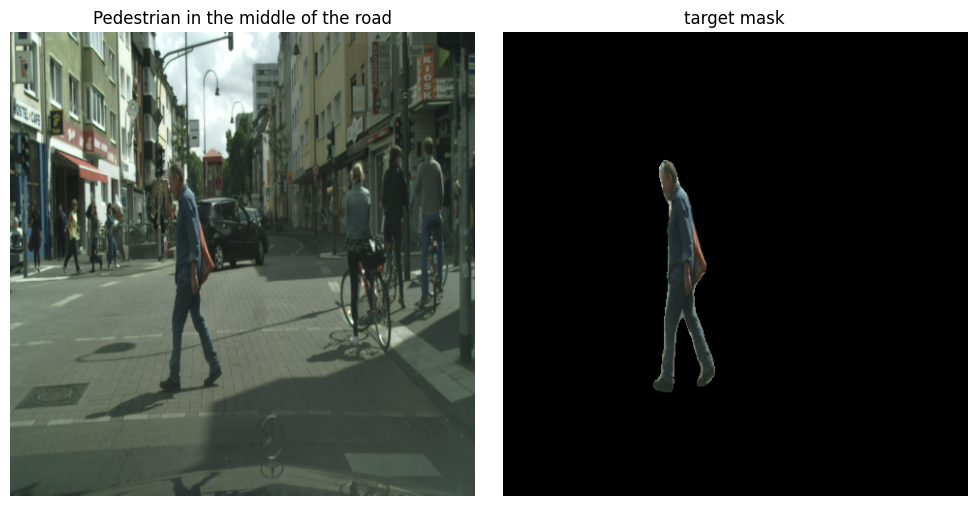

In [9]:
image = "test_02.png"
query = "Pedestrian in the middle of the road"
demo_infer(image, query)

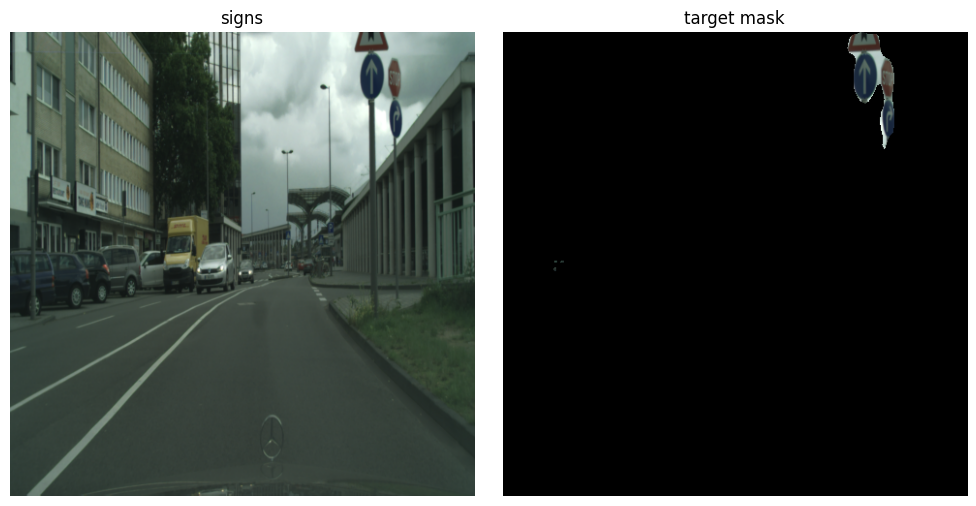

In [16]:
image = "test_03.png"
query = "signs"
demo_infer(image, query)